## Transfer Learning Resnet50 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


## Importing weights of ResNet50

In [4]:
# Import the ResNet library as shown below and add preprocessing layer to the front of ResNet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 61s 1us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

## Model using Transfer Learning

In [7]:
# our layers
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


### Data Augmentation

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


## Model Fitting

In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
61/61 [==============================] - 73s 1s/step - loss: 2.2737 - accuracy: 0.4131 - val_loss: 1.1664 - val_accuracy: 0.5556
Epoch 2/30
61/61 [==============================] - 71s 1s/step - loss: 1.1469 - accuracy: 0.5607 - val_loss: 1.0808 - val_accuracy: 0.6111
Epoch 3/30
61/61 [==============================] - 68s 1s/step - loss: 0.9008 - accuracy: 0.6422 - val_loss: 0.8330 - val_accuracy: 0.7222
Epoch 4/30
61/61 [==============================] - 65s 1s/step - loss: 1.2106 - accuracy: 0.5915 - val_loss: 1.0494 - val_accuracy: 0.6111
Epoch 5/30
61/61 [==============================] - 72s 1s/step - loss: 1.0410 - accuracy: 0.6084 - val_loss: 1.0382 - val_accuracy: 0.5000
Epoch 6/30
61/61 [==============================] - 65s 1s/step - loss: 0.9073 - accuracy: 0.6571 - val_loss: 0.8008 - val_accuracy: 0.6667
Epoch 7/30
61/61 [==============================] - 69s 1s/step - loss: 0.9533 - acc

In [16]:
import matplotlib.pyplot as plt

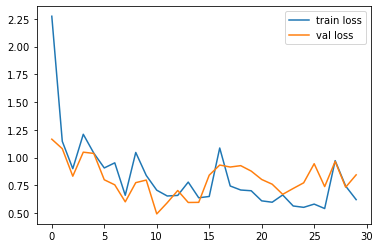

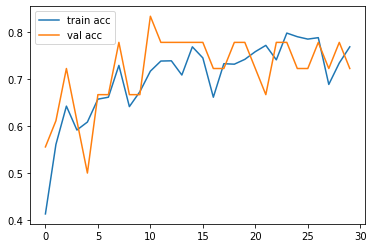

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

## Testing

In [35]:

y_pred = model.predict(test_set)


In [36]:
y_pred

array([[1.08071638e-03, 3.28080803e-02, 1.40938358e-02, 9.52017426e-01],
       [6.48212081e-05, 3.76272453e-07, 9.98108983e-01, 1.82576303e-03],
       [9.98069108e-01, 4.38354881e-08, 2.79694970e-04, 1.65126985e-03],
       [1.90574420e-03, 6.20834953e-07, 9.98076916e-01, 1.66221180e-05],
       [2.93544168e-03, 2.18342058e-03, 1.03987521e-02, 9.84482408e-01],
       [1.23585598e-03, 1.37195078e-04, 9.93926585e-01, 4.70046466e-03],
       [5.18485345e-03, 9.52562571e-01, 1.32831134e-04, 4.21197526e-02],
       [4.34744754e-04, 1.28285792e-02, 3.98747995e-03, 9.82749104e-01],
       [8.25350955e-02, 3.11684459e-01, 3.73537302e-01, 2.32243121e-01],
       [7.13894069e-01, 1.14700936e-01, 1.23989824e-02, 1.59005970e-01],
       [1.23955928e-01, 3.05530787e-01, 3.02462336e-02, 5.40267050e-01],
       [2.72632996e-03, 2.09897235e-02, 2.10788921e-02, 9.55205083e-01],
       [5.82802715e-03, 4.64445323e-01, 3.76655348e-02, 4.92061198e-01],
       [2.54945271e-03, 2.06118330e-06, 3.14365199e

In [37]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [38]:
y_pred

array([3, 2, 0, 2, 3, 2, 1, 3, 2, 0, 3, 3, 3, 3, 2, 1, 1, 2], dtype=int64)

### Loading the model and prediction

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [11]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [12]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])